#### Importación de Librerías de Preprocesamiento de Imágenes
Se importa `ImageDataGenerator` de Keras para realizar el preprocesamiento de imágenes. Este preprocesador escalará las imágenes dividiendo cada píxel por 255 (normalización).

#### Creación de Generadores de Datos
Se crean dos generadores: uno para entrenamiento (`train_generator`) y otro para validación (`validation_generator`). Ambos usan el método `flow_from_directory` para cargar imágenes desde las carpetas de entrenamiento y validación respectivamente, aplicando la normalización mencionada.

Las imágenes se redimensionarán a 150x150 píxeles y se establece un tamaño de lote (batch size) de 20. El `class_mode` se establece en 'categorical', lo que indica que se trata de una clasificación multiclase.

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Crear un generador de imágenes con normalización
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Definir las rutas a las carpetas de entrenamiento y validación
train_dir = './train'
validation_dir = './validation'

# Cargar imágenes de entrenamiento
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # Ajusta el tamaño según tus necesidades
    batch_size=32,
    class_mode='categorical')

# Cargar imágenes de validación
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),  # Ajusta el tamaño según tus necesidades
    batch_size=32,
    class_mode='categorical')



Found 2190 images belonging to 3 classes.
Found 545 images belonging to 3 classes.


#### Definición de la Arquitectura del Modelo
Se construye un modelo secuencial utilizando la API de Keras. El modelo comienza con una capa convolucional `Conv2D` seguida de una capa de `MaxPooling2D`. Después de aplanar la salida, se añaden dos capas densas. La última capa utiliza la activación 'sigmoid', lo cual es apropiado para la clasificación binaria.

#### Compilación del Modelo
Se compila el modelo con la función de pérdida `binary_crossentropy`, el optimizador `adam` y se sigue la métrica 'accuracy' para el rendimiento durante el entrenamiento.


In [21]:
from tensorflow.keras import layers, models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
# Agrega más capas convolucionales y de pooling según sea necesario
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))  # 'sigmoid' para dos clases, 'softmax' para más

model.compile(loss='categorical_crossentropy',  # 'categorical_crossentropy' para más clases
              optimizer='adam',
              metrics=['accuracy'])


#### Entrenamiento del Modelo
El modelo se entrena con los datos proporcionados por `train_generator`. Se configura para 50 `steps_per_epoch` y un total de 15 épocas. Se valida usando `validation_generator` con 50 `validation_steps`.


In [23]:
history = model.fit(
      train_generator,
      steps_per_epoch=50,
      epochs=15,
      validation_data=validation_generator,
      validation_steps=50)  

model.evaluate(validation_generator, steps=50)  

model.save('tu_modelo.h5')

Epoch 1/15
50/50 [==============================] - 8s 168ms/step - loss: 0.0359 - accuracy: 0.9893
Epoch 2/15
50/50 [==============================] - 8s 165ms/step - loss: 0.0287 - accuracy: 0.9944
Epoch 3/15
50/50 [==============================] - 8s 167ms/step - loss: 0.0164 - accuracy: 0.9950
Epoch 4/15
50/50 [==============================] - 8s 166ms/step - loss: 0.0115 - accuracy: 0.9981
Epoch 5/15
50/50 [==============================] - 8s 167ms/step - loss: 0.0325 - accuracy: 0.9943
Epoch 6/15
50/50 [==============================] - 8s 166ms/step - loss: 0.0328 - accuracy: 0.9918
Epoch 7/15
50/50 [==============================] - 8s 167ms/step - loss: 0.0308 - accuracy: 0.9943
Epoch 8/15
50/50 [==============================] - 9s 180ms/step - loss: 0.0202 - accuracy: 0.9962
Epoch 9/15
50/50 [==============================] - 9s 183ms/step - loss: 0.0195 - accuracy: 0.9944
Epoch 10/15
50/50 [==============================] - 9s 185ms/step - loss: 0.0211 - accuracy: 0.9950

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Este bloque de código está diseñado para evaluar el rendimiento del modelo de clasificación en el conjunto de validación. Los pasos son los siguientes:

1. Se importan las bibliotecas necesarias para el cálculo y la visualización: `sklearn.metrics` para la matriz de confusión, `matplotlib.pyplot` y `seaborn` para la visualización, `numpy` para el manejo de arrays, y `math` para cálculos matemáticos.

2. Se calcula el número de pasos necesarios para recorrer todo el conjunto de validación, utilizando la función `ceil` para asegurarse de que se incluyan todas las muestras si el total no es un múltiplo del tamaño del lote (`batch_size`).

3. Se usa el modelo entrenado para predecir las clases de las imágenes en el conjunto de validación. `model.predict` genera las probabilidades de las clases para cada muestra.

4. Se determina la clase predicha para cada muestra usando `np.argmax` sobre las predicciones, que selecciona el índice de la clase con la probabilidad más alta.

5. Se obtienen las etiquetas verdaderas directamente del generador de validación para compararlas con las predicciones.

6. Se calcula la matriz de confusión utilizando `confusion_matrix`, que compara las etiquetas verdaderas con las predicciones y resume los resultados en una matriz donde cada fila representa la clase verdadera y cada columna representa la clase predicha.

7. Se visualiza la matriz de confusión utilizando `seaborn.heatmap`, proporcionando una representación gráfica que facilita la identificación de clases que el modelo confunde regularmente.

Este paso es crucial para entender cómo el modelo está clasificando todas las clases y para identificar si hay alguna clase en particular con la que el modelo tiene dificultades.


18/18 [==============================] - 2s 111ms/step


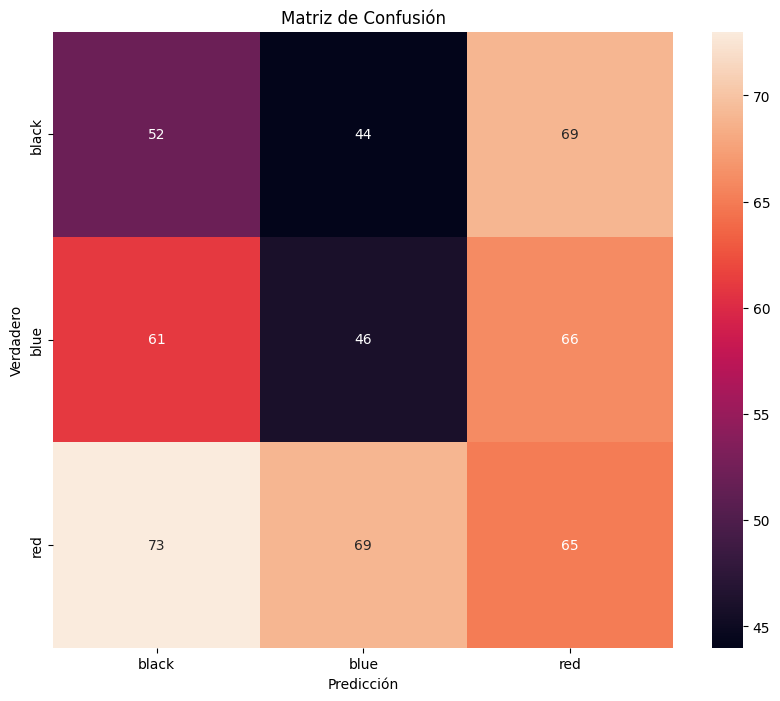

In [40]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

# Calcular el número correcto de pasos para el conjunto de validación
validation_steps = math.ceil(validation_generator.samples / validation_generator.batch_size)

# Obtener predicciones del modelo
predictions = model.predict(validation_generator, steps=validation_steps)

# Obtener las etiquetas de clase predichas
predicted_classes = np.argmax(predictions, axis=1)

# Obtener etiquetas verdaderas del generador
true_classes = validation_generator.classes


# Calcular la matriz de confusión
conf_mat = confusion_matrix(true_classes, predicted_classes)

# Obtener los nombres de las etiquetas de clase
class_labels = list(validation_generator.class_indices.keys())

# Visualizar la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Matriz de Confusión")
plt.ylabel("Verdadero")
plt.xlabel("Predicción")
plt.show()

1/1 [==============================] - 0s 51ms/step
Orden de clases en el conjunto de entrenamiento: {'black': 0, 'blue': 1, 'red': 2}
Orden de clases en el conjunto de validación: {'black': 0, 'blue': 1, 'red': 2}
La imagen es de un coche de color: [2]


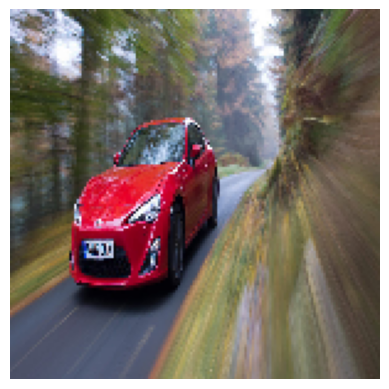

In [44]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

# Cargar el modelo entrenado
model = load_model('tu_modelo.h5')

# Cargar y preprocesar la imagen
img_path = 'rojo1.jpg'
img = image.load_img(img_path, target_size=(150, 150))  # Asegúrate de usar el mismo tamaño de objetivo que en el entrenamiento
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.  # Asegúrate de que la imagen esté normalizada de la misma manera que tus datos de entrenamiento

# Realizar la predicción
pred = model.predict(img_tensor)


train_class_indices = train_generator.class_indices
print("Orden de clases en el conjunto de entrenamiento:", train_class_indices)

validation_class_indices = validation_generator.class_indices
print("Orden de clases en el conjunto de validación:", validation_class_indices)

predicted_class = np.argmax(pred, axis=1)


print("La imagen es de un coche de color:", predicted_class)
plt.imshow(img)
plt.axis('off')  # Para no mostrar los ejes
plt.show()
